In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
import squints as sq

## Data loading

In [2]:
train_o = pd.read_csv("data/train.csv")
test_o = pd.read_csv("data/test.csv")

In [3]:
train_o.head()

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,...,1,6,14,6,6,1,1,10,2,1
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,...,6,11,1,6,1,4,4,1,13,0
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,...,1,4,21,12,1,16,10,4,9,0
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,...,13,12,2,4,2,7,1,2,11,1
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,...,12,2,2,4,1,3,1,11,15,1


In [4]:
prepr = lambda data:sq.relize(sq.fillize(sq.deidize(data)))

ftrainX, ftrainY = prepr(train_o.drop("y",axis=1)), train_o["y"]
ftrainX, ftestX = sq.normall([ftrainX, prepr(test_o)])

trainX, valX, trainY, valY = sq.splitize(train_o)
trainX, valX, testX = sq.normall([prepr(trainX), prepr(valX), prepr(test_o)])

## Forest

In [5]:
import sklearn.ensemble

forest = sklearn.ensemble.RandomForestClassifier(
    min_samples_leaf=100, n_jobs=2, verbose=1
)
forest.fit(trainX, trainY)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   46.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.4s finished


0.6713026527814374

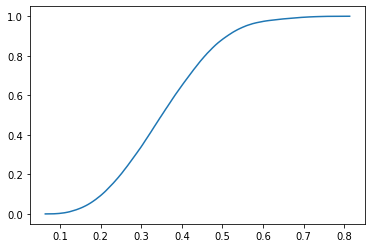

In [6]:
p = forest.predict_proba(valX)[:,1]
sq.ecdf(p)
sklearn.metrics.roc_auc_score(valY, p)

## Predict

In [7]:
# fit on all data and predict
forest = sklearn.ensemble.RandomForestClassifier(
    min_samples_leaf=100, n_jobs=2, verbose=1
)
forest.fit(ftrainX, ftrainY)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   28.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [8]:
sq.write(train_o["id"], forest.predict(ftrainX), "forest-train.csv")
sq.write(test_o["id"], forest.predict(ftestX), "forest-test.csv")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.7s finished
